In [4]:
#The necessary python libraries are imported here-
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Now we will read the dataset using read_csv() in a pandas dataframe.

In [6]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


5 rows × 31 columns

The dataset has 284807 rows and 31 columns.

In [7]:
data.shape

(284807, 31)

Now we will see if any null values are present in the data.

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As no null values are present we can go ahead and get other information of the data from data.info(). We can see that the values are either float or int.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

value_counts() returns a Series containing counts of unique values. This data has 2 classes 0 and 1. We can see that data with label 0 is a lot higher than data with label 1. Hence this data is highly unbalanced.

In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Balance Dataset
Here we will create a variable non_fraud which will contain the data of all the genuine transactions i.e. the transactions with ['Class']==0. fraud will contain the data of all the fraudulent transactions i.e. the transactions with ['Class']==1. The shape attribute tells us that non_fraud has 284315 rows and 31 columns and fraud has 492 rows and 31 columns.

In [11]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

To balance the data we will select 492 transactions randomly from non_fraud.Now you can see that non_fraud has 492 rows.

In [12]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

Now we will create the new balanced dataset by appending non_fraud to fraud. As ignore_index=True the resulting axis will be labeled 0, 1, …, n – 1.

In [13]:
data = fraud.append(non_fraud, ignore_index=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Now we will separate the feature space and the class. X will contain the feature space and y will contain the class label.

In [15]:
X = data.drop('Class', axis = 1)
y = data['Class']

Now we will split the data into training and testing set with the help of train_test_split(). test_size = 0.2 will keep 20% data for testing and 80% data will be used for training the model. random_state controls the shuffling applied to the data before applying the split. stratify = y means that the data is split in a stratified fashion, using y as the class labels.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

We can see that there are 787 samples for training and 197 samples for testing.

In [17]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

Now we are going to get the bring the data into the same range. StandardScaler() standardizes the features by removing the mean and scaling to unit variance. We will fit scaler only to the training dataset but we will tranform both the training as well as the testing dataset.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape

(787, 30)

Our data is 2 dimensional but neural networks accept 3 dimensional data. So we have to reshape() the data.

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

Build CNN

In [20]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

Now we will compile and fit the model. We are using Adam optimizer with 0.00001 learning rate. We will use 20 epochs to train the model. An epoch is an iteration over the entire data provided.validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch. As metrics = ['accuracy'] the model will be evaluated based on the accuracy.

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 30ms/step - loss: 1.0974 - accuracy: 0.6290 - val_loss: 0.6232 - val_accuracy: 0.8223
Epoch 2/20
25/25 [==============================] - 0s 16ms/step - loss: 0.6698 - accuracy: 0.7662 - val_loss: 0.5897 - val_accuracy: 0.8579
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.5891 - accuracy: 0.7840 - val_loss: 0.5623 - val_accuracy: 0.8985
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.4303 - accuracy: 0.8501 - val_loss: 0.5400 - val_accuracy: 0.9137
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.4050 - accuracy: 0.8551 - val_loss: 0.5165 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.4128 - accuracy: 0.8666 - val_loss: 0.4843 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3347 - accuracy: 0.8856 - val_loss: 0.4544 - val_accuracy: 0.9036
Epoch 8/20
25

Now we will visualize the results.

In [24]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

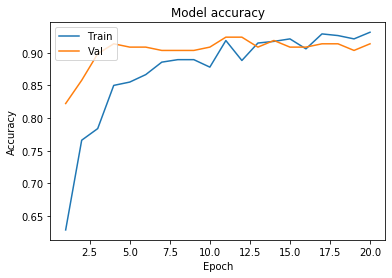

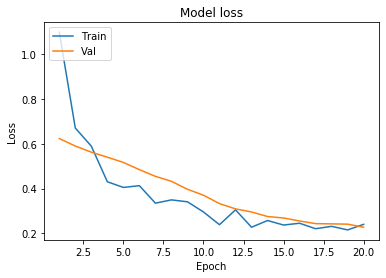

In [25]:
plot_learningCurve(history, epochs)

We can see that the training accuracy is higher than the validation accuracy. So we can say that they model is overfitting. We can add a MaxPool layer and increase the nuber of epochs to improve our accuracy.

Adding MaxPool

In [27]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 0s 9ms/step - loss: 1.3254 - accuracy: 0.5133 - val_loss: 0.6745 - val_accuracy: 0.5888
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 1.0052 - accuracy: 0.5858 - val_loss: 0.6541 - val_accuracy: 0.6142
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.7797 - accuracy: 0.6836 - val_loss: 0.6303 - val_accuracy: 0.6853
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.7243 - val_loss: 0.6007 - val_accuracy: 0.7716
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.7510 - val_loss: 0.5694 - val_accuracy: 0.7868
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5087 - accuracy: 0.7942 - val_loss: 0.5316 - val_accuracy: 0.8274
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7992 - val_loss: 0.4951 - val_accuracy: 0.8477
Epoch 8/50
25/25 [==

Now we will again visualize the results.

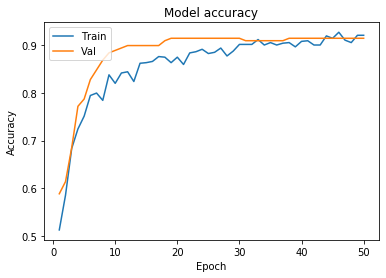

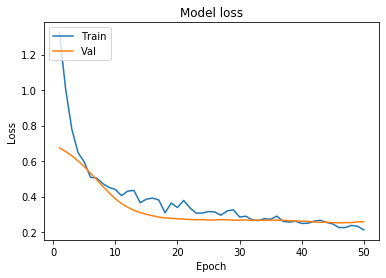

In [28]:
plot_learningCurve(history, epochs)

We can clearly see that we have got a better result after re-training our model with a few changes.